In [76]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('dataset/StudentPerformanceFactors.csv')


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [78]:
df.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


In [79]:
df.isnull().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

In [80]:
df.dropna(axis=1)

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Public,Positive,3,No,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Public,Negative,4,No,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Public,Neutral,4,No,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Public,Negative,4,No,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,Public,Neutral,4,No,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Public,Positive,2,No,Female,68
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,Public,Positive,2,No,Female,69
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Public,Negative,2,No,Female,68
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Private,Positive,3,No,Female,68


In [81]:
number_df = df.select_dtypes(include=[np.number])
print(number_df)

      Hours_Studied  Attendance  Sleep_Hours  Previous_Scores  \
0                23          84            7               73   
1                19          64            8               59   
2                24          98            7               91   
3                29          89            8               98   
4                19          92            6               65   
...             ...         ...          ...              ...   
6602             25          69            7               76   
6603             23          76            8               81   
6604             20          90            6               65   
6605             10          86            6               91   
6606             15          67            9               94   

      Tutoring_Sessions  Physical_Activity  Exam_Score  
0                     0                  3          67  
1                     2                  4          61  
2                     2                  4      

In [82]:
mean = number_df.mean()
print(mean)

Hours_Studied        19.975329
Attendance           79.977448
Sleep_Hours           7.029060
Previous_Scores      75.070531
Tutoring_Sessions     1.493719
Physical_Activity     2.967610
Exam_Score           67.235659
dtype: float64


In [83]:
median = number_df.median()
print(median)

Hours_Studied        20.0
Attendance           80.0
Sleep_Hours           7.0
Previous_Scores      75.0
Tutoring_Sessions     1.0
Physical_Activity     3.0
Exam_Score           67.0
dtype: float64


In [84]:
mode = number_df.mode()
print(mode)

   Hours_Studied  Attendance  Sleep_Hours  Previous_Scores  Tutoring_Sessions  \
0             20          67            7               66                  1   

   Physical_Activity  Exam_Score  
0                  3          68  


In [85]:
std = number_df.std()
print(std)

Hours_Studied         5.990594
Attendance           11.547475
Sleep_Hours           1.468120
Previous_Scores      14.399784
Tutoring_Sessions     1.230570
Physical_Activity     1.031231
Exam_Score            3.890456
dtype: float64


In [86]:
min = number_df.min()
print(min)

Hours_Studied         1
Attendance           60
Sleep_Hours           4
Previous_Scores      50
Tutoring_Sessions     0
Physical_Activity     0
Exam_Score           55
dtype: int64


In [87]:
max = number_df.max()
print(max)

Hours_Studied         44
Attendance           100
Sleep_Hours           10
Previous_Scores      100
Tutoring_Sessions      8
Physical_Activity      6
Exam_Score           101
dtype: int64


In [88]:
range = max-min
print(range)

Hours_Studied        43
Attendance           40
Sleep_Hours           6
Previous_Scores      50
Tutoring_Sessions     8
Physical_Activity     6
Exam_Score           46
dtype: int64


In [91]:
percentiles = number_df.quantile([0.25, 0.50, 0.75])
print(percentiles)

      Hours_Studied  Attendance  Sleep_Hours  Previous_Scores  \
0.25           16.0        70.0          6.0             63.0   
0.50           20.0        80.0          7.0             75.0   
0.75           24.0        90.0          8.0             88.0   

      Tutoring_Sessions  Physical_Activity  Exam_Score  
0.25                1.0                2.0        65.0  
0.50                1.0                3.0        67.0  
0.75                2.0                4.0        69.0  


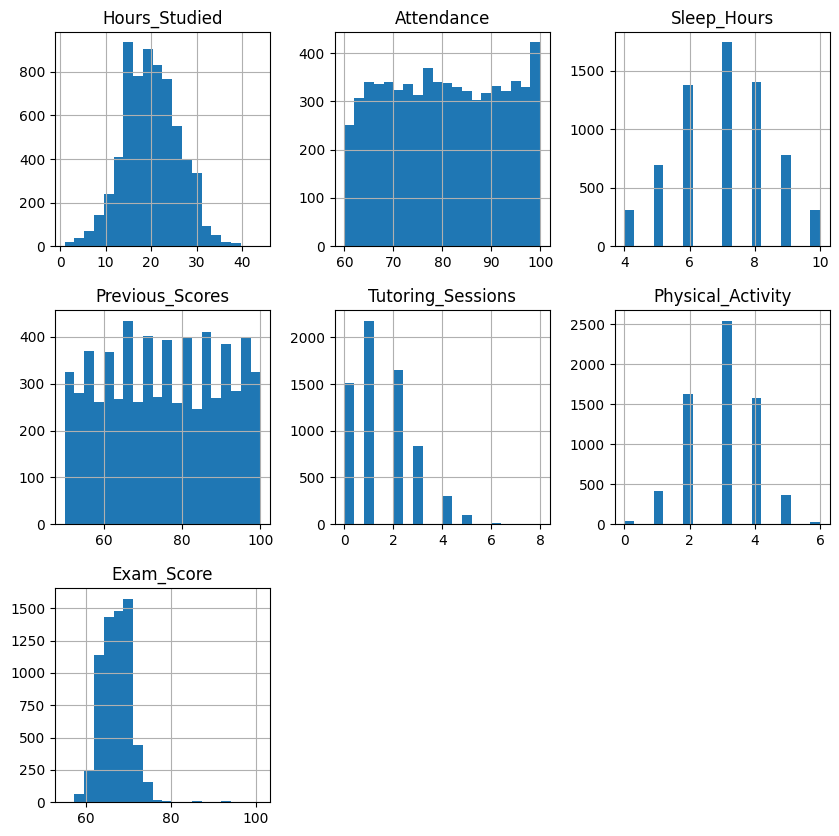

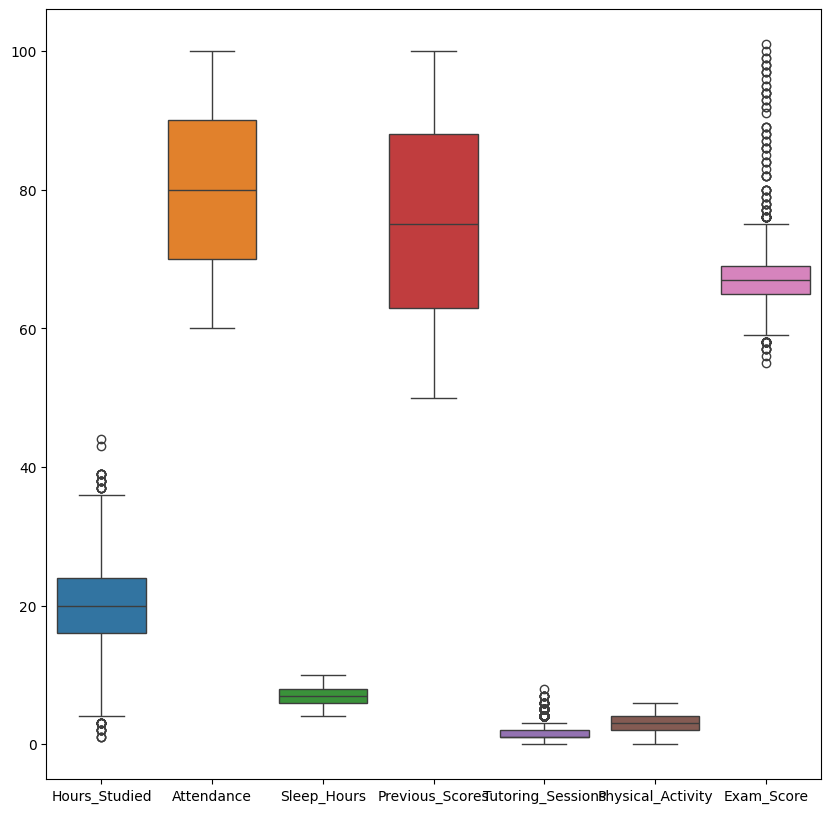

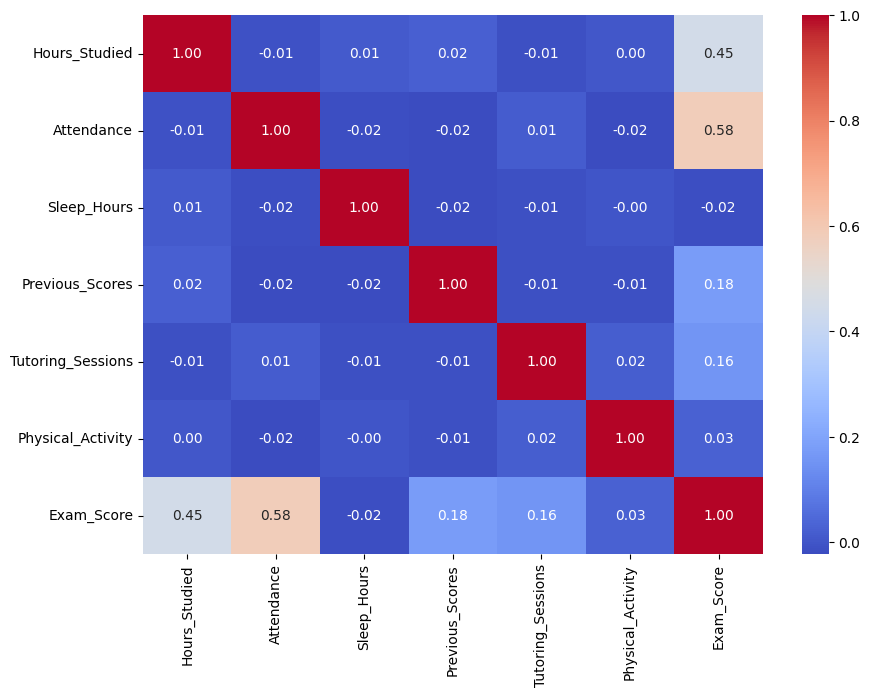

In [100]:
number_df.hist(bins=20, figsize=(10, 10))
plt.show()

plt.figure(figsize=(10, 10))
sns.boxplot(data=number_df)
plt.show()

plt.figure(figsize=(10, 7))
sns.heatmap(number_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.show()